# Notebook for exploring the Chinese-English Dictionary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load words table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
df['id'].count() # Number of lexical units

45557

In [3]:
# Example row
df[df.simplified == '佛']

,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,"Sanskrit: buddha, Pali: buddha, Japanese: buts...",3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,As a modifier describing a concept that relate...,3618


In [4]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              17670
verb               9958
proper noun        9150
adjective          3980
phrase             1568
adverb              787
set phrase          726
measure word        306
pronoun             214
conjunction         196
phonetic            192
number              113
foreign             111
\N                  103
particle            102
preposition          97
onomatopoeia         70
interjection         55
ordinal              35
pattern              30
auxiliary verb       25
bound form           21
suffix               21
expression           10
prefix               10
radical               5
infix                 2
Name: grammar, dtype: int64

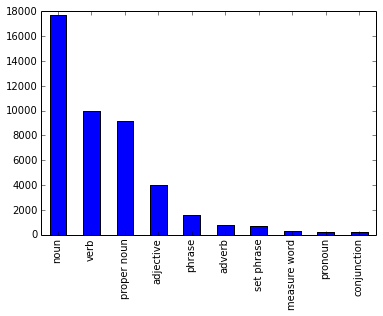

In [5]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [6]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()

Classical Chinese         7993
Buddhism                  5013
History                   2650
Actions                   1542
Condition                 1098
Places                     990
Geography                  876
Emotion                    802
Language                   792
Thought                    788
Health                     773
Quantity                   722
Information Technology     719
Time                       654
Characteristic             641
Food and Drink             621
Function Words             608
Idiom                      594
Form                       566
Art                        544
Linguistics                473
Names                      448
Religion                   412
Movement                   403
Ethics                     398
Work                       380
Architecture               367
Position                   367
Nature                     348
Law                        346
                          ... 
Computer Science            16
Chinese 

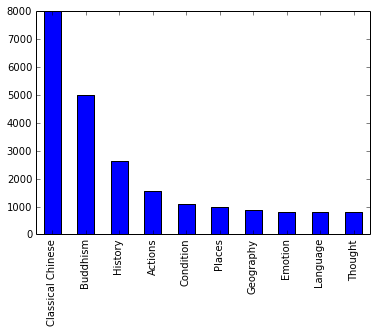

In [7]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [8]:
# Unique headwords
len(df['headword'].unique())

37121

In [9]:
# Words with no notes
df[df.notes == '\N']

,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
152,153,圆,圓,yuán,circle,noun,\N,\N,形态,Form,\N,\N,\N,yuan2.mp3,\N,152
261,262,关系,關係,guānxì,relations,noun,\N,\N,联系,Relationship,\N,\N,\N,guan1xi4.mp3,\N,262
262,263,美国之音,美國之音,Měiguó Zhīyīn,VOA,proper noun,\N,\N,媒体,Media,\N,\N,\N,mei3guo2zhi1yin1.mp3,\N,263
265,266,波送,\N,bōsòng,to broadcast,verb,\N,\N,媒体,Media,\N,\N,\N,bo1song4.mp3,\N,266
267,268,节目,節目,jiémù,program,noun,\N,\N,媒体,Media,\N,\N,\N,jie2mu4.mp3,\N,268
268,269,欢迎,歡迎,huānyíng,to welcome,verb,\N,\N,交际,Social Interaction,\N,\N,\N,huan1ying2.mp3,\N,269
269,270,收听,收聽,shōutīng,to listen to,verb,\N,\N,行为,Actions,\N,\N,\N,shou1ting1.mp3,\N,270
273,274,波,\N,bō,to broadcast,verb,\N,\N,媒体,Media,\N,\N,\N,bo1.mp3,\N,274
274,275,出,\N,chū,to go out,verb,\N,\N,移动,Movement,\N,\N,\N,chu1.mp3,\N,275
279,280,听,聽,tīng,to listen,verb,\N,\N,行为,Actions,\N,\N,\N,ting.mp3,\N,280
